# Dimensionality Reduction

* Many Machine Learning problems involve thousand or even million of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution, as we will see. This problem is often referred to as the `curse of dimensionality`.
* Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For example, consider the MNIST images the pixel on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information confirm that these pixel are utterly unimportant for the classification task. Moreover, two neighboring pixels are often highly correlated if you merge them into a single pixel (eg, by taking the mean of the two pixel intensities), you will not lose muvh information.
> Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perfrorm slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some case, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won't speed up training)
*Apart from speeding up training , dimensionality reduction is also extremely useful for data visualization (or Data viz), Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such as clusters. Moreover, Data viz is essential to communicate your conclusion to people who are not data scientists, in particular decision makers who will use your results.
* In this notebook we will discuss the curse of dimensionality and get a sense of what goes on in high-dimensional space. Then,we will present the two main approaches to dimensionality reduction (projection and Mainfold learning), and we will go through three of the most popular dimensionality reduction techniques: PCA, kernel PCA, and LLE

# The Curse Of Dimensionality

* We are so used to living in three dimensions that oue intution fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard to picture in our mind.
* It turns out that many things behave very differently in high-dimensional space. For example, if you pick a random point in a unit square ()

# Main Approaches For Dimensionality Reduction

* In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances actually lie within  a much lower dimensional subspace of the high-dimensional space. This sound very abstract, so let's look at an example. 

# PCA

* Principle Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

## Preserving the Variance

* Before we can project the training set onto a lower dimensional hyperplane, you first need to choose the right hyperplane, For example, a simple 2D dataset.
* It seems resonalble to select the axis that preserve the maximum amount of variance, as it will most likely lose less information than the projections. Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the rather simple idea behind PCA.

## Principal Components

* PCA identifies the axis that accounts for the largest amount of variance in the training set. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on-as many axes as the number of dimensional in the dataset.
* The unit vector that defines the ith axis is called the ith principal component (PC).

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=None)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

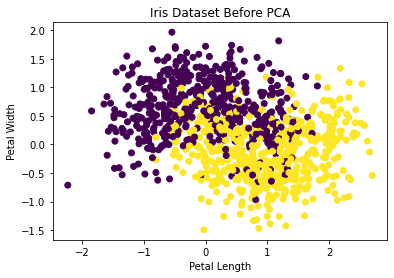

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=y);
plt.title("Iris Dataset Before PCA")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

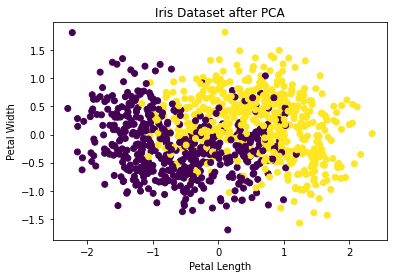

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X2D[:,0], X2D[:,1], c=y);
plt.title("Iris Dataset after PCA")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [11]:
pca.components_.T[:,0]

array([ 0.94305985, -0.33262309])

##### Explained Variance Ration

* Another very useful piece of information is the explained variance ratio of each principal component, available via the explained_variance_ration_ variable. It indicates the proportion of the dataset's variance ratios of the first two components of the 3D dataset.

In [12]:
pca.explained_variance_ratio_

array([0.73754499, 0.26245501])

This tells us that 73% of the dataset's variance lies along the first axis, and 26% lies among the second axis. This leaves less than 1.2% for the third axis, so it is reasonable to assume that it probably carries little information

# Choosing the Right Number of Dimensions

* Instead of arbitrary choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance. Unless, of course, you are reducing dimensionality for data visualization in that case you will generally want to reduce the dimensionality down to 2 or 3.
* The following code computes PCA without reducing dimensionality, thenn computes the minimum number of dimensions required to preserve 95% of the training set's variance

In [15]:
pca = PCA()
pca.fit(X)

PCA()

In [17]:
import numpy as np

cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.73754499, 1.        ])

In [18]:
d =  np.argmax(cumsum >= 0.95) + 1
d

2

You could then set n_components=d and run PCA again. However, there is a much better option instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve.

In [19]:
pca = PCA(n_components=0.95)
pca

PCA(n_components=0.95)

In [20]:
X_reduced = pca.fit_transform(X)

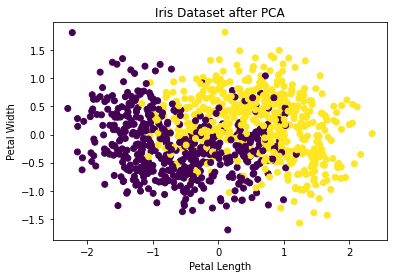

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y);
plt.title("Iris Dataset after PCA")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

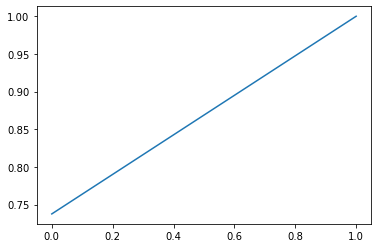

In [25]:
plt.plot(cumsum)